# Первое упражнение. Построение классификатора с помощью модели решающего дерева.

0.9833333333333333


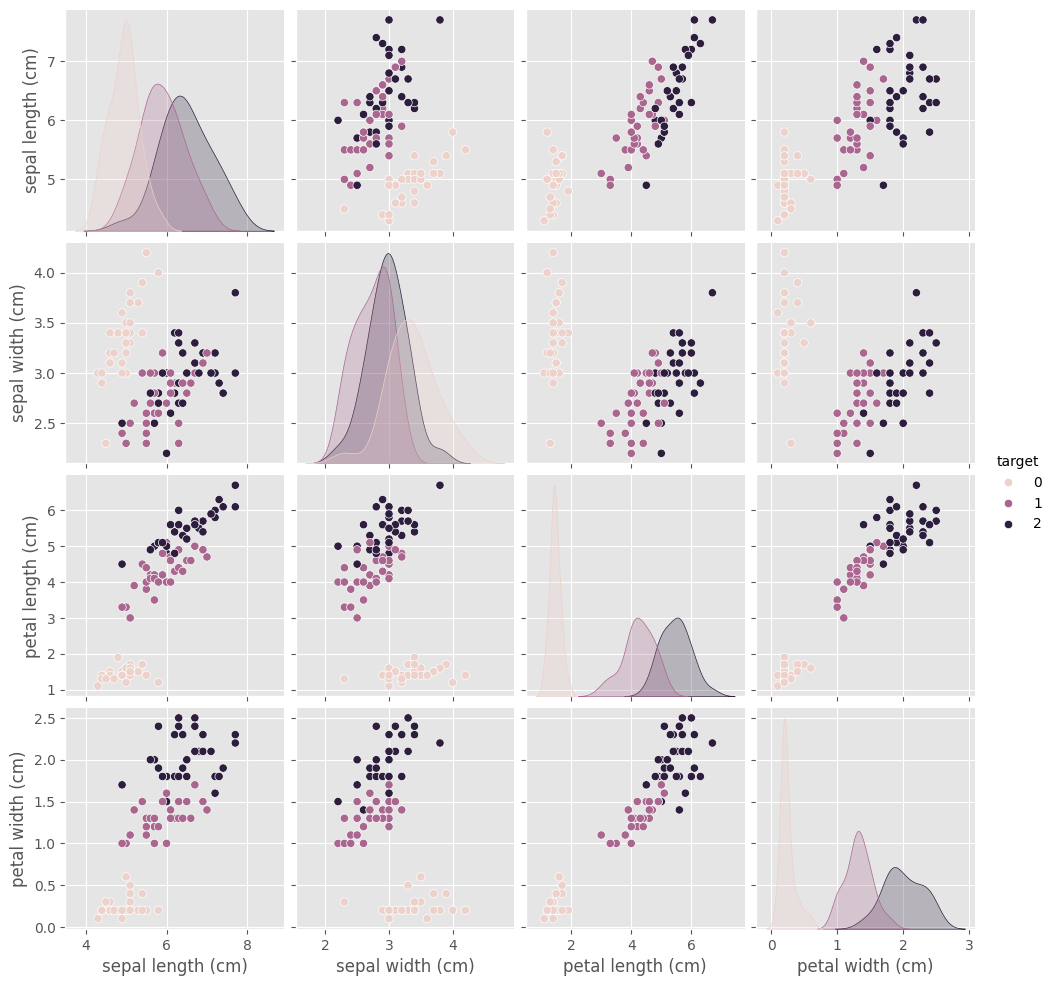

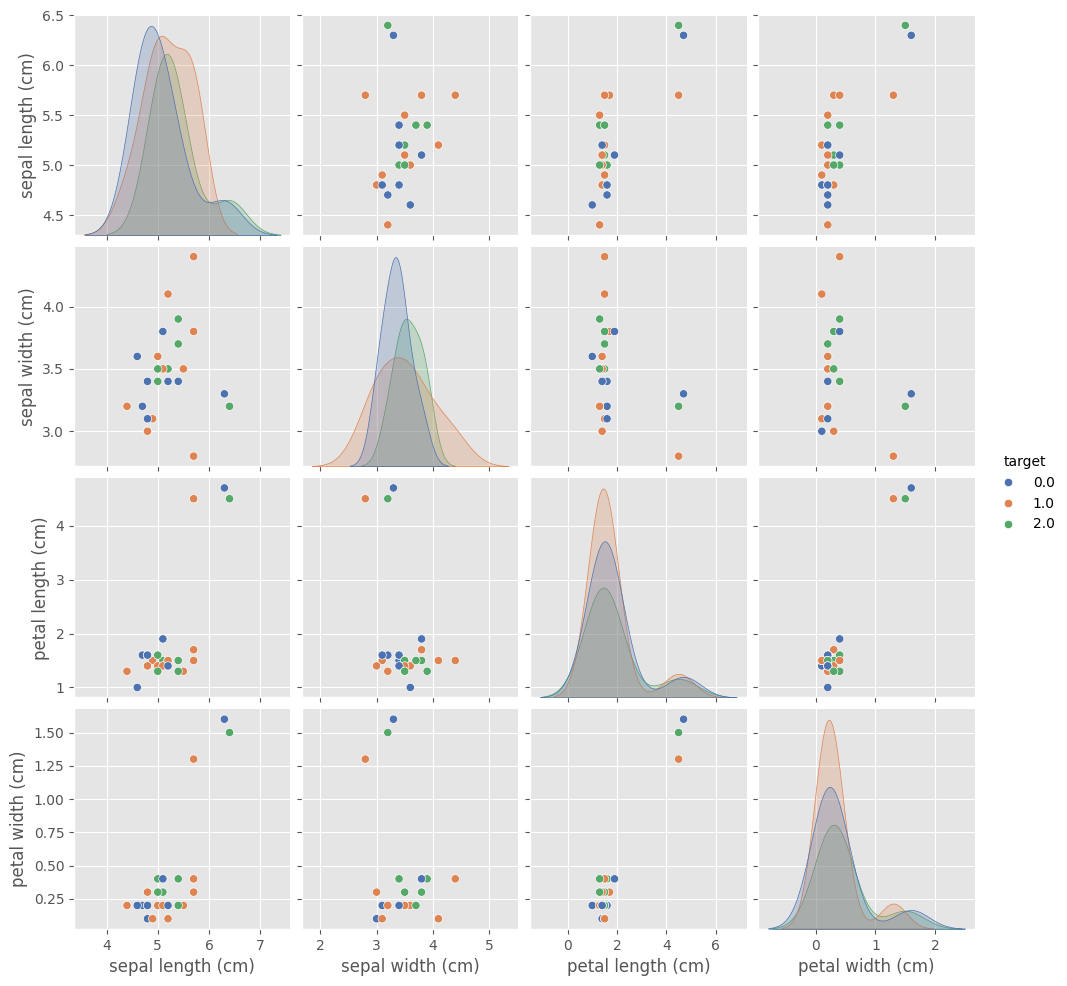

In [219]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

# Импортируйте необходимые классы и функции из соответствующих модулей sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris
X,y= load_iris(as_frame=True,return_X_y=True)

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state= 42)
clf = DecisionTreeClassifier(max_depth=3,criterion= 'entropy', random_state= 42)

clf.fit(X_train, y_train)
preds = pd.DataFrame(clf.predict(x_test),columns=['target'])

acc = accuracy_score(y_test,preds)
print(acc)
sns.pairplot(pd.concat([X_train,y_train],axis=1),hue='target')
sns.pairplot(pd.concat([x_test,preds],axis=1),hue='target',palette='deep')


# Второе упражнение. Поиск наилучших гиперпараметров

In [133]:
df = pd.read_csv('TRAIN-3.csv')
df = df.rename(columns= {'Unnamed: 0':'Index'})
df[obj_features]
df.index = df['Index']
df = df.drop(columns='Index')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [163]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
obj_features = df.columns[df.dtypes == 'object']
num_features = df.columns[df.dtypes == 'float64']
encoder = OneHotEncoder(sparse_output=False)
# for column in obj_features:   
encoded = encoder.fit_transform(df[obj_features])

one_hot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(obj_features))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(obj_features, axis=1)

df_encoded = shuffle(df_encoded,random_state= 42)
df_encoded = df_encoded.dropna()
df_encoded_x,x_test,df_encoded_y,y_test = train_test_split(df_encoded.drop(columns = 'price'),df_encoded['price'],train_size=0.3)
df_encoded_y.values





array([4018.,  505., 1893., ..., 1031., 3920., 7585.])

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
hyper_params = {}
hyper_params['squared_error'] = [12,45]
hyper_params['friedman_mse'] = [16,95]
hyper_params['poisson'] = [22,33]
result = {}
for criteria in ['squared_error','friedman_mse','poisson']:
    for depth in hyper_params[criteria]:
        model = DecisionTreeRegressor(criterion=criteria,max_depth=depth,random_state= 42)
        score = cross_val_score(model,X=df_encoded_x.values,y=df_encoded_y.values,cv=10,scoring='r2')
        result[criteria+' with depth '+str(depth)] = np.mean(score)
result
        


{'squared_error with depth 12': 0.8416296901837794,
 'squared_error with depth 45': 0.7726129314863831,
 'friedman_mse with depth 16': 0.803133577585187,
 'friedman_mse with depth 95': 0.7728479258295764,
 'poisson with depth 22': 0.7781484475992718,
 'poisson with depth 33': 0.7701765675132108}

In [153]:
# model.predict(x_test)
x_test

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
13020,1.11,61.9,57.0,6.63,6.66,4.11,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29932,0.38,62.1,55.4,4.63,4.68,2.89,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10929,0.91,62.2,58.0,6.21,6.17,3.85,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25724,2.11,61.2,55.0,8.33,8.30,5.09,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26950,2.06,61.7,58.0,8.20,8.15,5.04,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49557,0.71,64.1,60.0,0.00,0.00,0.00,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36876,0.39,62.3,57.0,4.65,4.69,2.91,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33110,0.31,61.0,60.0,4.37,4.35,2.66,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7607,1.00,61.5,61.0,6.35,6.43,3.93,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


/Users/glebslivin/venvs/ML/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


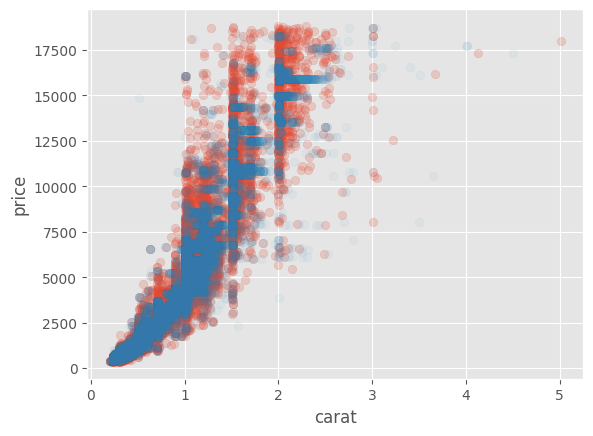

/Users/glebslivin/venvs/ML/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


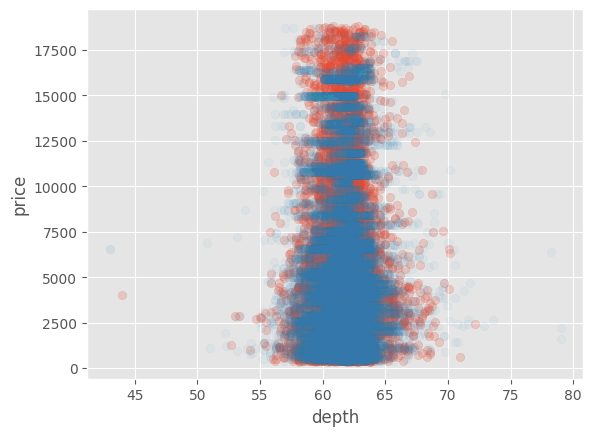

/Users/glebslivin/venvs/ML/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


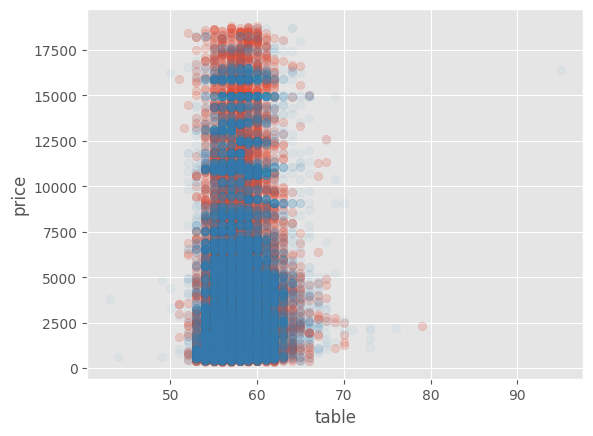

/Users/glebslivin/venvs/ML/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


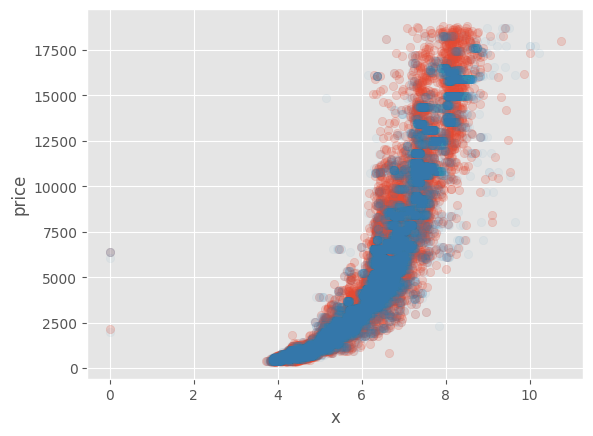

/Users/glebslivin/venvs/ML/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


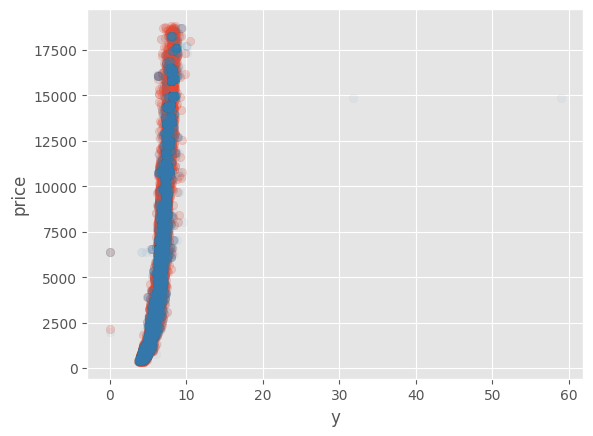

/Users/glebslivin/venvs/ML/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


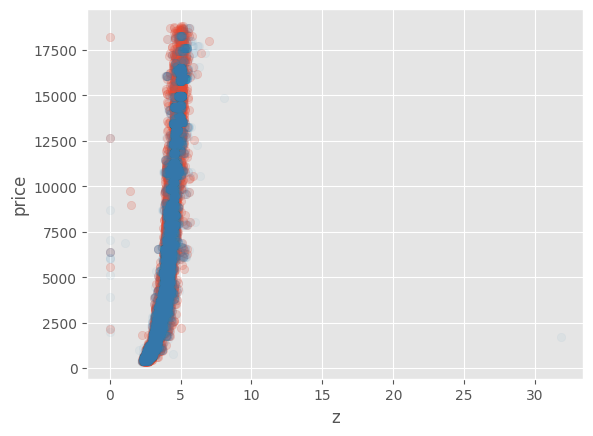

In [181]:
plt.style.use('ggplot')
model = DecisionTreeRegressor(criterion='squared_error',max_depth=12)
model.fit(X=df_encoded_x.values,y=df_encoded_y.values)
plt.set_cmap('hsv')
for feature in num_features:
    plt.scatter(df_encoded_x[feature],df_encoded_y,alpha= 0.2)
    plt.scatter(x_test[feature],model.predict(x_test),alpha = 0.05)
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.show()